# Using geoPandas

Here we give a quick example of using geoPandas.  The main support which `tilemapbase` gives is to allow you to work with a standardised projection, either [EPSG:3857](http://spatialreference.org/ref/sr-org/6864/) or [EPSG:3785](http://spatialreference.org/ref/epsg/popular-visualisation-crs-mercator/)

Update January 2020: Now demonstrates the [new crs handling code](https://geopandas.org/projections.html) from GeoPandas, and the new compatibility code in TileMapBase.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas as gpd
import tilemapbase
tilemapbase.start_logging()

In [2]:
features = [
    { "properties" : {"name" : "My office"},
        "geometry" : { "type": "Point", "coordinates" : (-1.554934, 53.804198)}
    },
    { "properties" : {"name" : "Library"},
        "geometry" : { "type": "Point", "coordinates" : (-1.554664, 53.806221)}
    },
    { "properties" : {"name" : "Gym"},
        "geometry" : { "type": "Point", "coordinates" : (-1.553366, 53.804251)}
    }   
]

frame = gpd.GeoDataFrame.from_features(features)

In [3]:
frame = frame.set_crs("EPSG:4326")
frame.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
frame = frame.to_crs("EPSG:3857")
frame

,geometry,name
0,POINT (-173094.461 7133160.606),My office
1,POINT (-173064.405 7133541.956),Library
2,POINT (-172919.912 7133170.597),Gym


In [5]:
extent = tilemapbase.extent_from_frame(frame, buffer = 25)

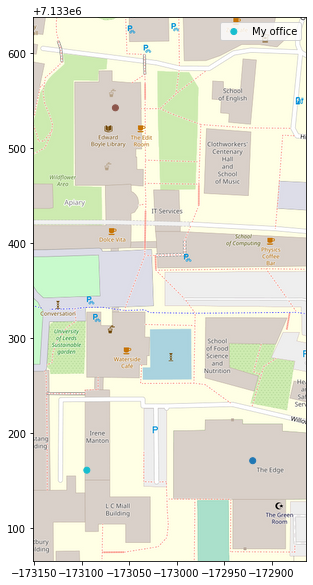

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=400)
plotter.plot(ax)
frame.plot(ax=ax, column="name")
ax.legend(frame.name)
None